In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.set_index('id', inplace=True)


In [4]:
df.sort_index(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 67 to 72940
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [6]:
df.isnull().any()
#Only bmi has null values

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [7]:
df['bmi'].isnull().sum()

201

In [8]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
67,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0
72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0


In [9]:
simp = df.copy()

In [10]:
simp['gender'].replace({'Female':0, 'Male':1}, inplace=True)
simp['ever_married'].replace({'No':0, 'Yes':1}, inplace=True)
simp['Residence_type'].replace({'Rural':0, 'Urban':1}, inplace=True)
simp = simp.drop(columns=['work_type', 'smoking_status'])

In [11]:
df[df['gender'] == 'Other']
#only one so drop it


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [12]:
simp[simp['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
id,,,,,,,,,
56156,Other,26.0,0,0,0,0,143.33,22.4,0


In [13]:
df.drop(index= 56156 , inplace=True)
simp.drop(index= 56156, inplace=True)

In [14]:
simp['gender'].astype('int64')

id
67       0
77       0
84       1
91       0
99       0
        ..
72911    0
72914    0
72915    0
72918    0
72940    0
Name: gender, Length: 5109, dtype: int64

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imputer = SimpleImputer(strategy='mean')
simp = pd.DataFrame(imputer.fit_transform(simp), columns=simp.columns)

In [17]:
simp.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [18]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [19]:
simp.sort_index(inplace=True)
df.reset_index(inplace=True)
df.sort_index(inplace=True)

In [20]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
1,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
2,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
3,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
4,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
5105,72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0
5106,72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0
5107,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.3,Unknown,1


In [21]:
df['bmi'] = simp['bmi']

In [22]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [23]:
df['smoking_status'].unique()

array(['formerly smoked', 'Unknown', 'never smoked', 'smokes'],
      dtype=object)

In [24]:
df[df['smoking_status'] == 'Unknown']
#Alot of unknown

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,77,Female,13.0,0,0,No,children,Rural,85.81,18.60000,Unknown,0
4,99,Female,31.0,0,0,No,Private,Urban,108.89,52.30000,Unknown,0
5,121,Female,38.0,0,0,Yes,Private,Urban,91.44,28.89456,Unknown,0
7,132,Female,80.0,0,0,Yes,Govt_job,Urban,84.86,28.89456,Unknown,0
9,163,Female,20.0,0,0,No,Private,Rural,94.67,28.80000,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,72836,Female,59.0,0,0,Yes,Private,Urban,65.98,31.10000,Unknown,0
5102,72867,Male,16.0,0,0,No,Private,Rural,99.49,22.00000,Unknown,0
5105,72914,Female,19.0,0,0,No,Private,Urban,90.57,24.20000,Unknown,0
5107,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.30000,Unknown,1


In [25]:
cate = simp.copy()
cate['smoking_status'] = df['smoking_status'].replace({'Unknown':np.nan})

In [26]:
cate

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status
0,0.0,17.0,0.0,0.0,0.0,1.0,92.97,28.89456,0.0,formerly smoked
1,0.0,13.0,0.0,0.0,0.0,0.0,85.81,18.60000,0.0,NaN
2,1.0,55.0,0.0,0.0,1.0,1.0,89.17,31.50000,0.0,never smoked
3,0.0,42.0,0.0,0.0,0.0,1.0,98.53,18.50000,0.0,never smoked
4,0.0,31.0,0.0,0.0,0.0,1.0,108.89,52.30000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
5104,0.0,57.0,1.0,0.0,1.0,0.0,129.54,60.90000,0.0,smokes
5105,0.0,19.0,0.0,0.0,0.0,1.0,90.57,24.20000,0.0,NaN
5106,0.0,45.0,0.0,0.0,1.0,1.0,172.33,45.30000,0.0,formerly smoked
5107,0.0,53.0,1.0,0.0,1.0,1.0,62.55,30.30000,1.0,NaN


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Create a new dataframe with non-null values in the target column
df_train = cate[cate['smoking_status'].notnull()]

# Split data into features and target
X_train = df_train.drop('smoking_status', axis=1)
y_train = df_train['smoking_status']

# Create a Random Forest classifier and fit the data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict missing values in the target column
X_missing = cate[cate['smoking_status'].isnull()].drop('smoking_status', axis=1)
y_missing = rf.predict(X_missing)

# Fill missing values with predicted values
cate.loc[cate['smoking_status'].isnull(), 'smoking_status'] = y_missing

In [28]:
cate

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status
0,0.0,17.0,0.0,0.0,0.0,1.0,92.97,28.89456,0.0,formerly smoked
1,0.0,13.0,0.0,0.0,0.0,0.0,85.81,18.60000,0.0,never smoked
2,1.0,55.0,0.0,0.0,1.0,1.0,89.17,31.50000,0.0,never smoked
3,0.0,42.0,0.0,0.0,0.0,1.0,98.53,18.50000,0.0,never smoked
4,0.0,31.0,0.0,0.0,0.0,1.0,108.89,52.30000,0.0,smokes
...,...,...,...,...,...,...,...,...,...,...
5104,0.0,57.0,1.0,0.0,1.0,0.0,129.54,60.90000,0.0,smokes
5105,0.0,19.0,0.0,0.0,0.0,1.0,90.57,24.20000,0.0,never smoked
5106,0.0,45.0,0.0,0.0,1.0,1.0,172.33,45.30000,0.0,formerly smoked
5107,0.0,53.0,1.0,0.0,1.0,1.0,62.55,30.30000,1.0,never smoked


In [29]:
cate.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
smoking_status       0
dtype: int64

In [30]:
df['smoking_status'] = cate['smoking_status']

In [31]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [32]:
#Now our data is cleaned ! lets do some insights

In [33]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,17.0,0,0,No,Private,Urban,92.97,28.89456,formerly smoked,0
1,77,Female,13.0,0,0,No,children,Rural,85.81,18.60000,never smoked,0
2,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.50000,never smoked,0
3,91,Female,42.0,0,0,No,Private,Urban,98.53,18.50000,never smoked,0
4,99,Female,31.0,0,0,No,Private,Urban,108.89,52.30000,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.90000,smokes,0
5105,72914,Female,19.0,0,0,No,Private,Urban,90.57,24.20000,never smoked,0
5106,72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.30000,formerly smoked,0
5107,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.30000,never smoked,1


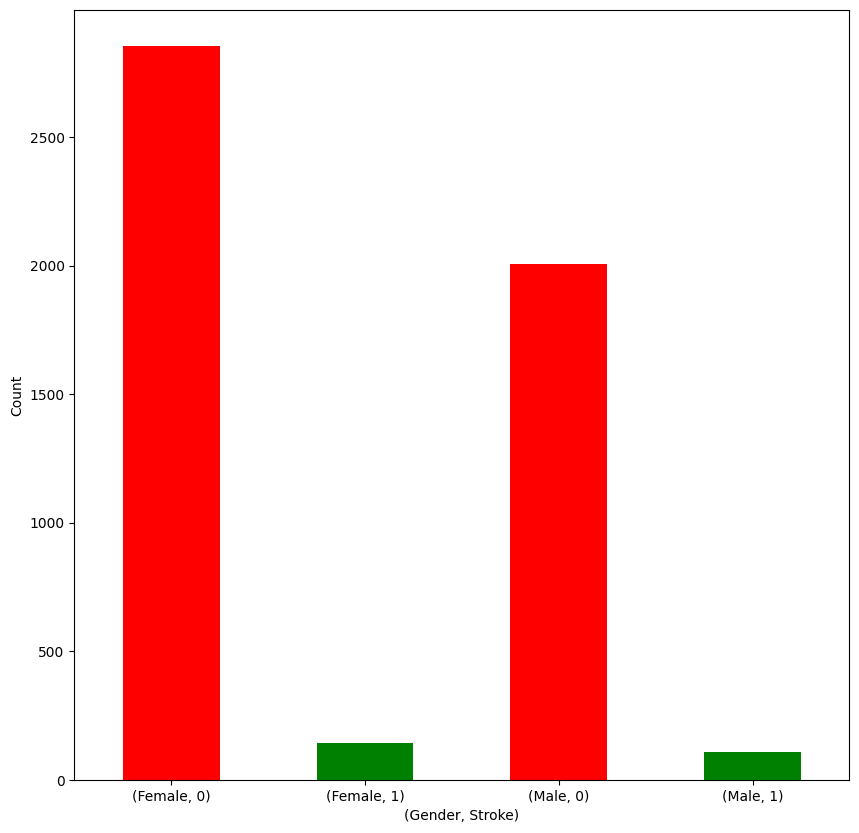

In [34]:
counts = df.groupby(['gender', 'stroke']).size()

# plot the results
plt.figure(figsize=(10,10))
ax = counts.plot(kind='bar', color=['red', 'green'])
ax.set_xlabel('(Gender, Stroke)')
plt.xticks(rotation=0)
ax.set_ylabel('Count')
plt.show()
#females have slightly more strokes than men on this data set.
#this could be biased since females are more than men in this dataset.

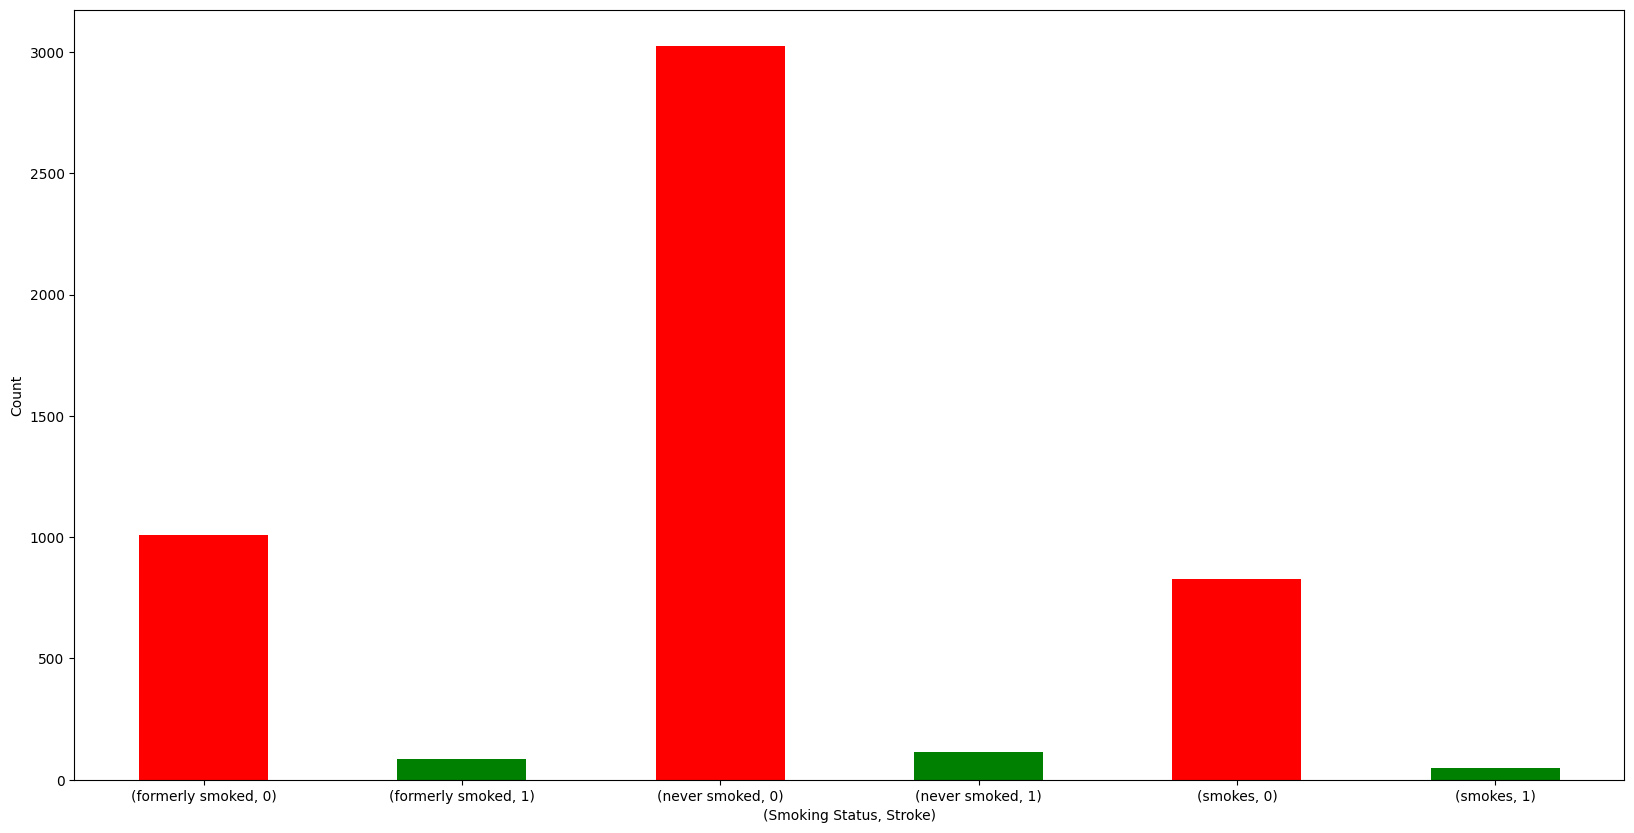

In [35]:
counts = df.groupby(['smoking_status', 'stroke']).size()

# plot the results
plt.figure(figsize=(20,10))
ax = counts.plot(kind='bar', color=['red', 'green'])
ax.set_xlabel('(Smoking Status, Stroke)')
plt.xticks(rotation=0)
ax.set_ylabel('Count')
plt.show()
#if you compared between smokers who have strokes and who doesnt, you will find out that the gap is much closer that who never smoked.
#data is a bit biased since there's a gap between the numbers of each category

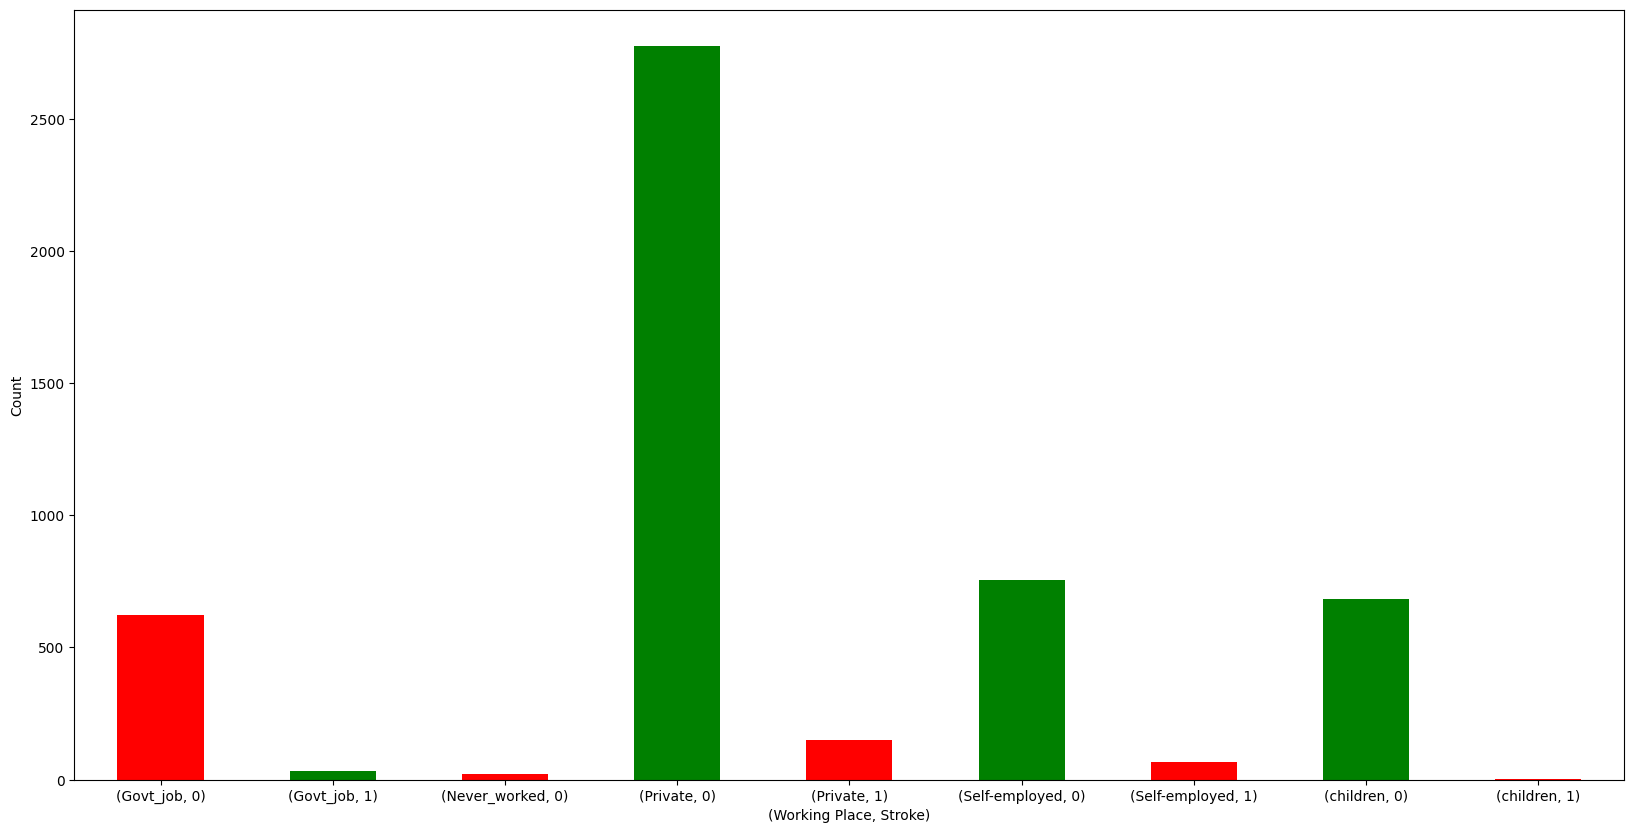

In [36]:
counts = df.groupby(['work_type', 'stroke']).size()

# plot the results
plt.figure(figsize=(20,10))
ax = counts.plot(kind='bar', color=['red', 'green'])
ax.set_xlabel('(Working Place, Stroke)')
plt.xticks(rotation=0)
ax.set_ylabel('Count')
plt.show()
#The workplace that has the highest strokes recorded is Gov Job, and the none recorded in Unemployed

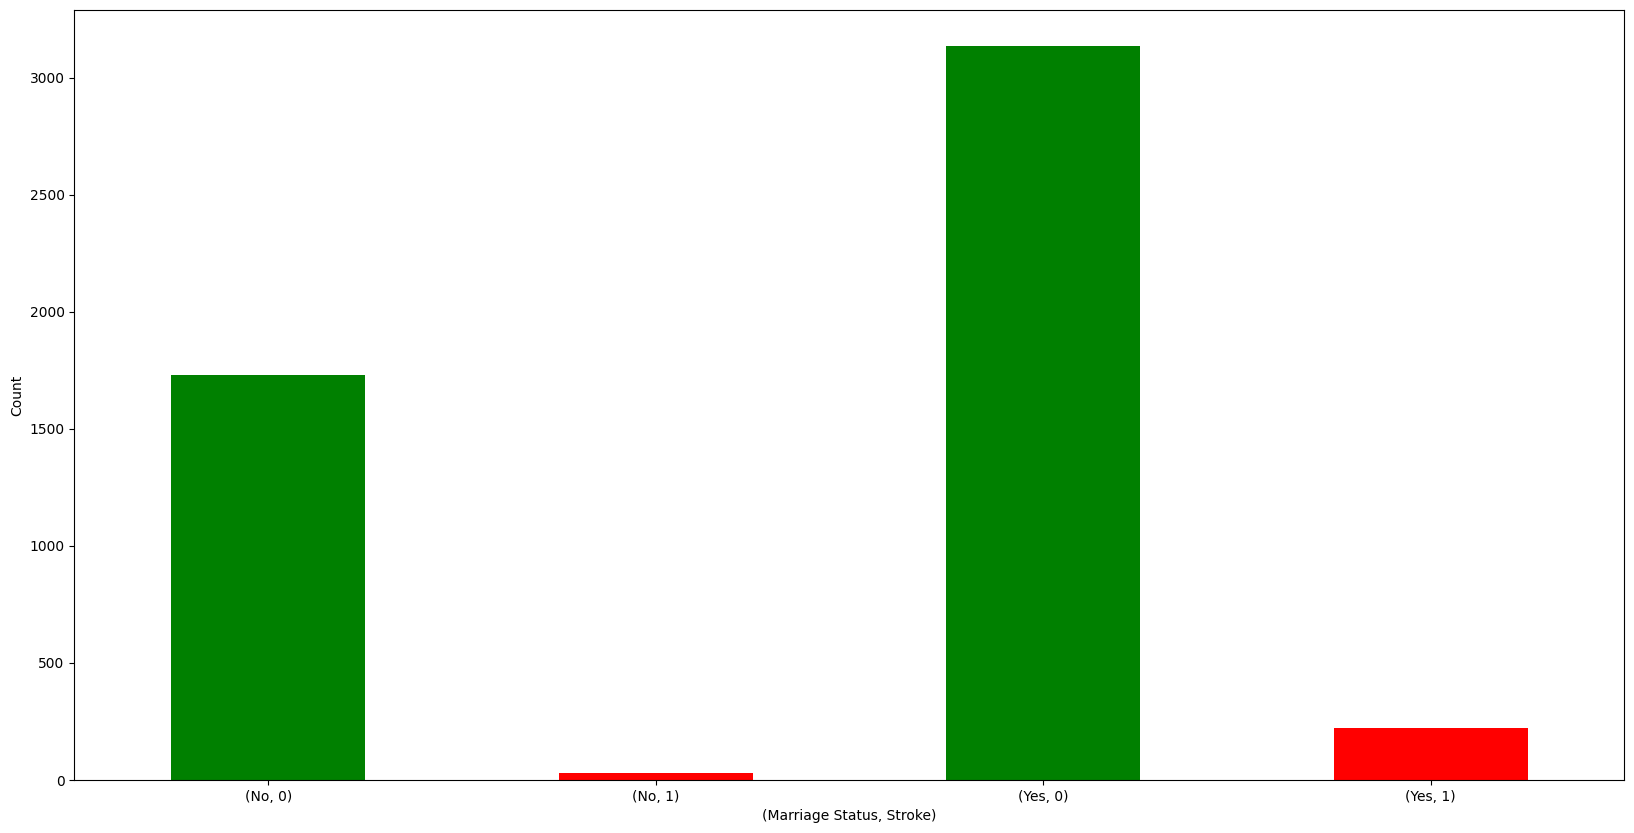

In [37]:
counts = df.groupby(['ever_married', 'stroke']).size()

# plot the results
plt.figure(figsize=(20,10))
ax = counts.plot(kind='bar', color=['Green', 'red'])
ax.set_xlabel('(Marriage Status, Stroke)')
plt.xticks(rotation=0)
ax.set_ylabel('Count')
plt.show()
#Almost the same percentage

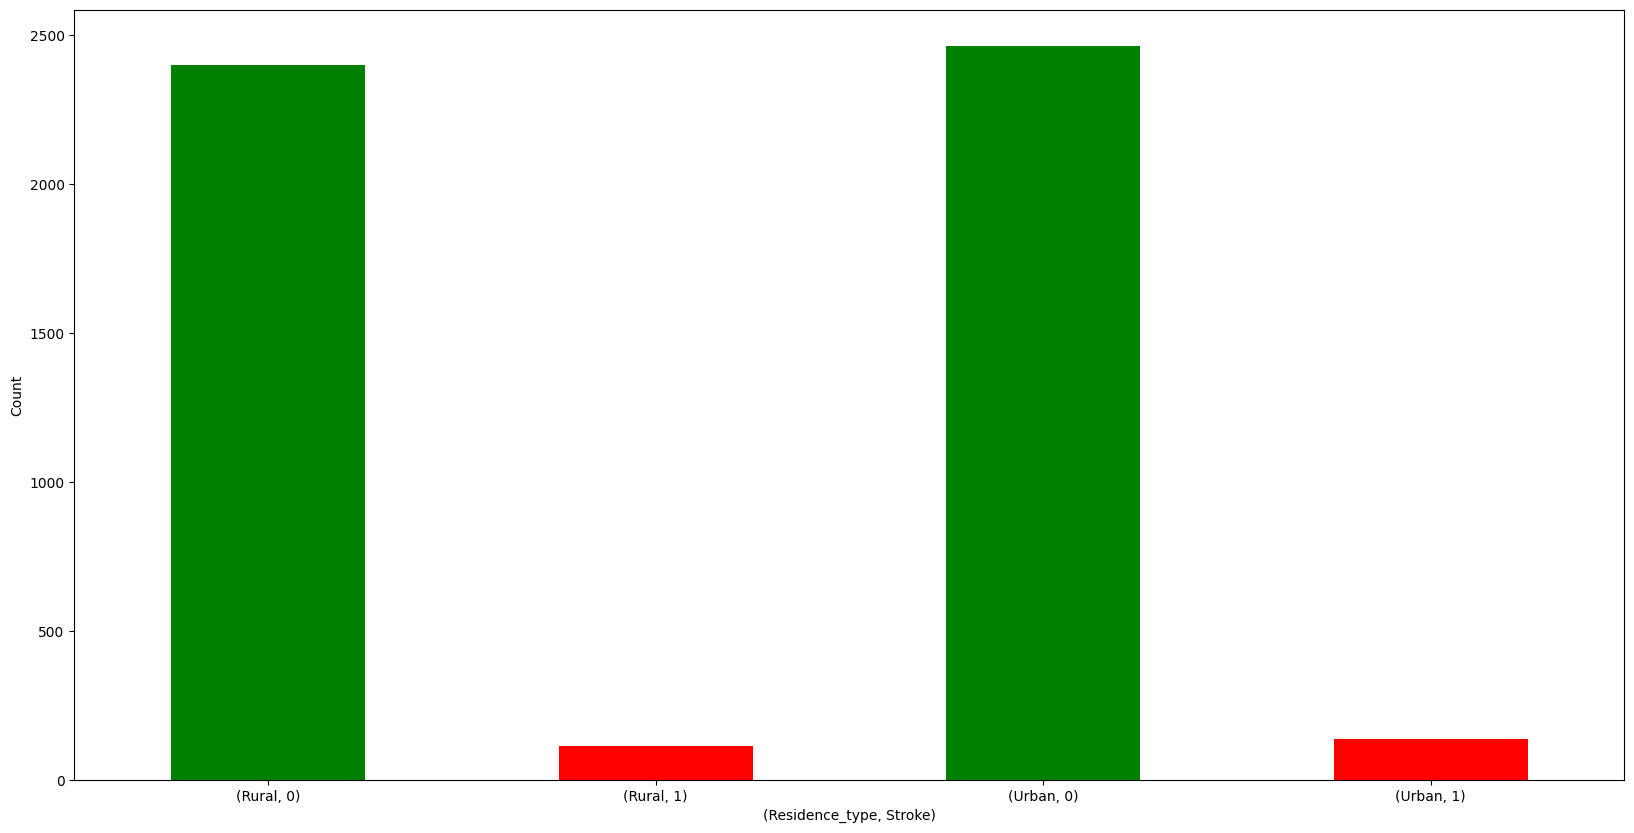

In [38]:
counts = df.groupby(['Residence_type', 'stroke']).size()

# plot the results
plt.figure(figsize=(20,10))
ax = counts.plot(kind='bar', color=['Green', 'red'])
ax.set_xlabel('(Residence_type, Stroke)')
plt.xticks(rotation=0)
ax.set_ylabel('Count')
plt.show()
#Almost the same percentage

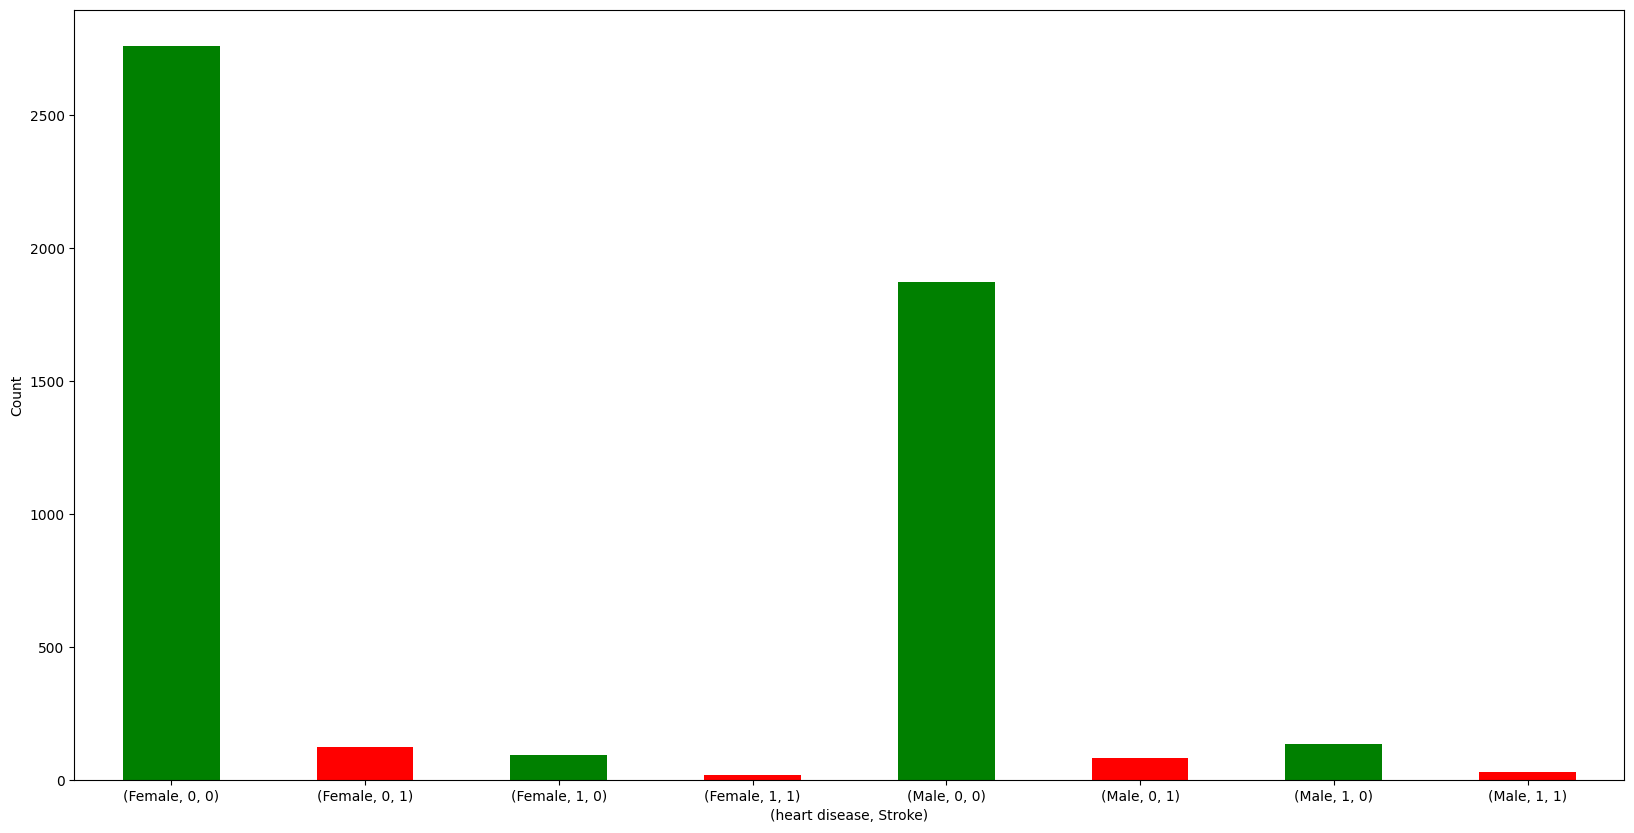

In [39]:
counts = df.groupby(['gender', 'heart_disease', 'stroke']).size()

# plot the results
plt.figure(figsize=(20,10))
ax = counts.plot(kind='bar', color=['Green', 'red'])
ax.set_xlabel('(heart disease, Stroke)')
plt.xticks(rotation=0)
ax.set_ylabel('Count')
plt.show()
#people who have heart disease is more likely to have stroke

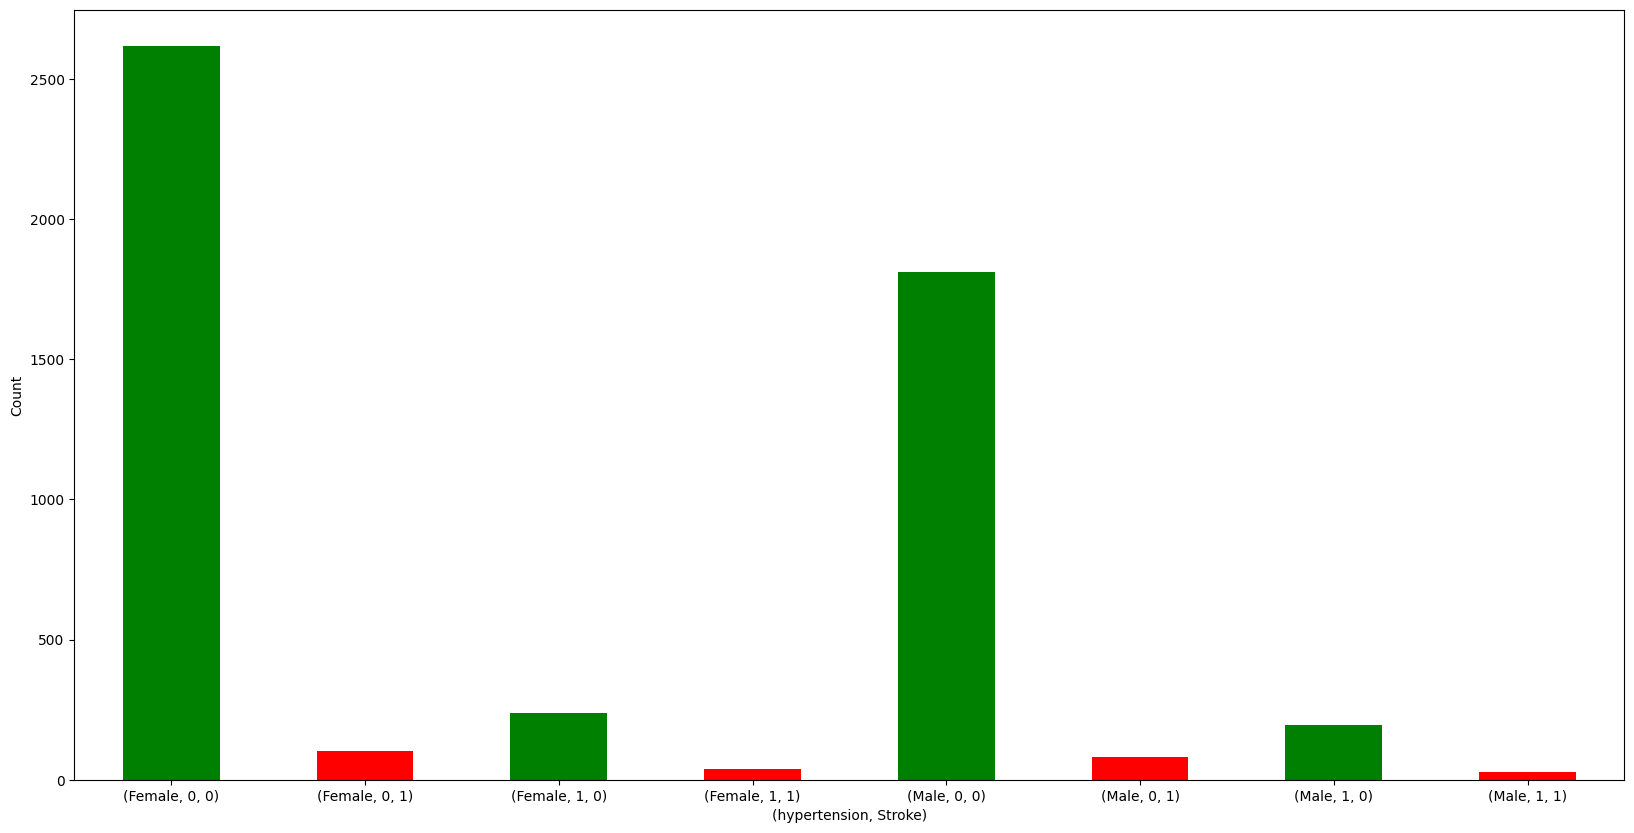

In [40]:
counts = df.groupby(['gender', 'hypertension', 'stroke']).size()

# plot the results
plt.figure(figsize=(20,10))
ax = counts.plot(kind='bar', color=['Green', 'red'])
ax.set_xlabel('(hypertension, Stroke)')
plt.xticks(rotation=0)
ax.set_ylabel('Count')
plt.show()
#people who have hypertension is more likely to have stroke

In [41]:
#lets work with machine learning!

In [42]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,67,Female,17.0,0,0,No,Private,Urban,92.97,28.89456,formerly smoked,0
1,77,Female,13.0,0,0,No,children,Rural,85.81,18.60000,never smoked,0
2,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.50000,never smoked,0
3,91,Female,42.0,0,0,No,Private,Urban,98.53,18.50000,never smoked,0
4,99,Female,31.0,0,0,No,Private,Urban,108.89,52.30000,smokes,0


In [43]:
df['work_type'].unique()

array(['Private', 'children', 'Govt_job', 'Self-employed', 'Never_worked'],
      dtype=object)

In [44]:
df['gender'].replace({'Female':0, 'Male':1}, inplace=True)
df['ever_married'].replace({'No':0, 'Yes':1}, inplace=True)
df['Residence_type'].replace({'Rural':0, 'Urban':1}, inplace=True)
df['smoking_status'].replace({'formerly smoked':0, 'never smoked':1, 'smokes':2}, inplace=True)
df['work_type'].replace({'Private':0, 'children':1, 'Self-employed':2, 'Never_worked':3, 'Govt_job':4}, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   int64  
 7   Residence_type     5109 non-null   int64  
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   int64  
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.1 KB


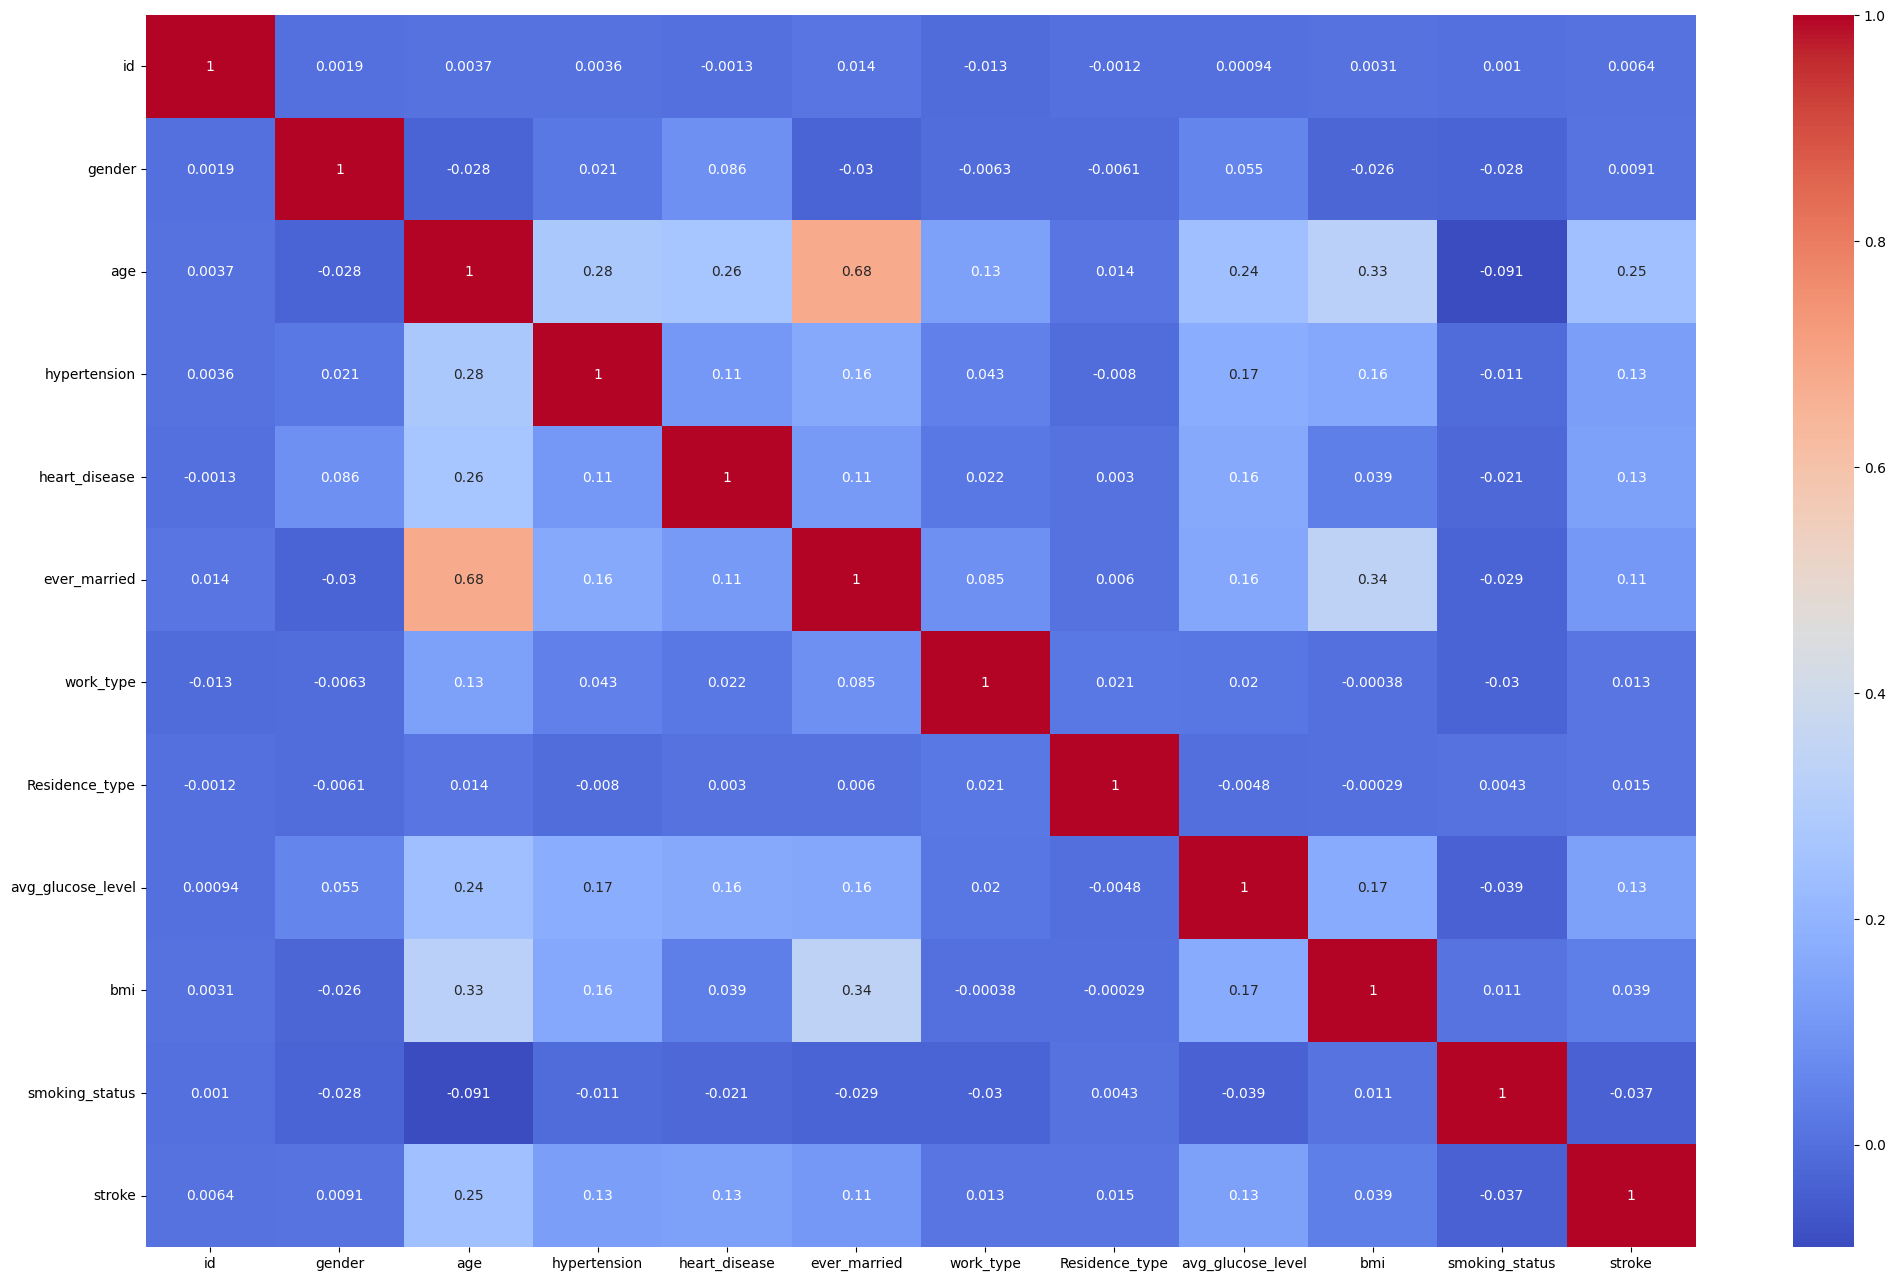

In [46]:
plt.figure(figsize=(25, 16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [47]:
#Gender , bmi , residence type , work type have weak correlation , lets drop them

In [48]:
df.drop(columns=['gender' , 'bmi' , 'Residence_type' , 'work_type'], inplace=True)

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error
#metrics for evaluating the model

In [50]:
X = df.drop(columns='stroke')
y= df['stroke']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Splitting the data

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#Algorithms we will work with

In [56]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=14)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

neighbors = np.arange(1, 10)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    
    
    knn.fit(X_train_res, y_train_res)
    
    
    train_accuracies[neighbor] = knn.score(X_train_res, y_train_res)
    test_accuracies[neighbor] = knn.score(X_test, y_test)


In [59]:
test_accuracies
#best one is 2

{1: 0.776908023483366,
 2: 0.8356164383561644,
 3: 0.738747553816047,
 4: 0.8013698630136986,
 5: 0.723091976516634,
 6: 0.7729941291585127,
 7: 0.7084148727984344,
 8: 0.7485322896281801,
 9: 0.6868884540117417}

In [60]:
train_accuracies

{1: 1.0,
 2: 0.9328358208955224,
 3: 0.9036284096757591,
 4: 0.8880597014925373,
 5: 0.8642563046834791,
 6: 0.853834276891405,
 7: 0.8360782295419454,
 8: 0.8322182192485846,
 9: 0.8154915079773546}

In [67]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_res, y_train_res)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn,zero_division=1)
recall_knn = recall_score(y_test, y_pred_knn,zero_division=1)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
AMSE = mean_squared_error(y_test, y_pred_knn)
                        

KNN_SCORES = {'Accuracy': accuracy_knn, 'Precision':precision_knn , 'Recall': recall_knn}
KNN_SCORES['AMSE'] = AMSE

In [68]:
KNN_SCORES

{'Accuracy': 0.8356164383561644,
 'Precision': 0.0945945945945946,
 'Recall': 0.2916666666666667,
 'AMSE': 0.1643835616438356}

In [69]:
confusion_matrix_knn

array([[840, 134],
       [ 34,  14]], dtype=int64)

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([
        ('scaler', StandardScaler()), 
        ('classifier', LogisticRegression())
    ])
#creating a pipeline to merge both steps into one

In [71]:
pipe.fit(X_train_res, y_train_res)
y_pred_log = pipe.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
AMSE_log = mean_squared_error(y_test, y_pred_log)
confusion_matrix_log = confusion_matrix(y_test, y_pred_log)

LOG_SCORES = {'Accuracy': accuracy_log, 'Precision':precision_log , 'Recall': recall_log, 'AMSE':AMSE_log}


In [72]:
LOG_SCORES

{'Accuracy': 0.7935420743639922,
 'Precision': 0.13777777777777778,
 'Recall': 0.6458333333333334,
 'AMSE': 0.20645792563600782}